<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Nov10-11/perceptr%C3%B3n_multiLay_Nred_McLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón multicapa
Consta de varias capas de neuronas, cada neurona en una capa esta conectada a todas las neuronas de la capa anterior y posterior.\
Una neurona recibe entonces todas las salidas generadas por las neuronas de la capa anterior y  en base a esas entradas genera una nueva salida, este tipo de redes multicapa son mas eficientes para detectar patrones más complejos.
En nuestro caso se añadió una capa oculta de dos neuronas, la salida de esta capa pasa a la capa de salía con una sola neurona la cual genera la salida o predicción final “$\alpha$”\
A este tipo de proceso se le conoce como Fordward propagation y básicamente consiste en el proceso de pasar datos de entrada a través de la red neuronal, capa por capa, calculando operaciones lineales y aplicando funciones de activación hasta obtener la salida final de la red


In [4]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [2]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
files = glob.glob('/content/drive/MyDrive/Machine_Learn/CATS_DOGS/*')
len(files)

1787

In [5]:
# Número de pixeles para nuestras imágenes.
num_px = 64

train_x = []
train_y = []


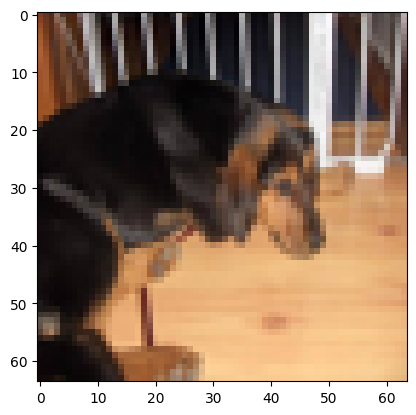

In [6]:
for file in files[:835]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)

train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

# Reordenar aleatoriamente los datos
permutation = np.random.permutation(len(train_y))
train_x = train_x[permutation]
train_y = train_y[permutation]

plt.imshow(train_x[68])

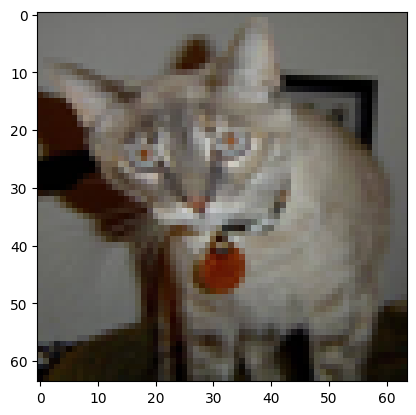

In [7]:
test_x = []
test_y = []

for file in files[835:]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)

test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

plt.imshow(test_x[721])


In [8]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y = train_y.reshape((1, train_y.shape[0]))
test_set_y = test_y.reshape((1, test_y.shape[0]))

train_set_x = train_x_flatten / 255
test_set_x = test_x_flatten / 255

In [18]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    # Ambas neuronas de la capa oculta reciben la misma entrada
    A1_1 = A1[0, :]
    A1_2 = A1[1, :]
    Z2 = np.array([A1_1, A1_2])  # Salidas de las neuronas de la capa oculta
    A2 = sigmoid(np.dot(W2, Z2) + b2)  # Salida de la capa de salida
    return A2

# Inicialización de parámetros
input_size = num_px * num_px * 3
hidden_size = 2
output_size = 1

W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Forward propagation
predictions = forward_propagation(W1, b1, W2, b2, train_set_x)

# Visualizar algunas predicciones
for i in range(5):
    print("Predicción:", predictions[0, i], "Etiqueta verdadera:", train_set_y[0, i])

Predicción: 0.5002483576849303 Etiqueta verdadera: 1
Predicción: 0.5002164687320865 Etiqueta verdadera: 1
Predicción: 0.5001599093689465 Etiqueta verdadera: 1
Predicción: 0.500358241092426 Etiqueta verdadera: 1
Predicción: 0.5004270448838213 Etiqueta verdadera: 1


In [19]:
predictions

array([[0.50024836, 0.50021647, 0.50015991, 0.50035824, 0.50042704,
        0.50032688, 0.5002612 , 0.50013503, 0.50017839, 0.50008033,
        0.50025476, 0.50004945, 0.50042447, 0.50026799, 0.50007218,
        0.50035907, 0.50018711, 0.50041558, 0.50015078, 0.50027683,
        0.50017618, 0.50039787, 0.50027968, 0.50030009, 0.50029807,
        0.50035221, 0.5002379 , 0.50000506, 0.50014976, 0.50017285,
        0.50009015, 0.50054198, 0.50018466, 0.50027769, 0.50029883,
        0.50006136, 0.50005506, 0.50027722, 0.50038495, 0.50043546,
        0.5002656 , 0.50011891, 0.50034686, 0.50008122, 0.50020645,
        0.50040513, 0.50040446, 0.50004612, 0.50029055, 0.50030493,
        0.50038066, 0.50018339, 0.50038367, 0.50018666, 0.50028658,
        0.50033399, 0.50013207, 0.50019623, 0.50038408, 0.5001523 ,
        0.50034763, 0.50016396, 0.5002226 , 0.50025333, 0.50021721,
        0.50031982, 0.50031332, 0.50009754, 0.50007426, 0.50009023,
        0.50003746, 0.50014085, 0.50028193, 0.50